In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import torchvision.transforms.functional as Fr
import torch.nn.functional
import matplotlib.pyplot as plt
import time
import os
import copy

In [ ]:
class SquarePad:
    def __call__(self, image):
        """
        Args:
            img (PIL Image): Image to be padded.

        Returns:
            PIL Image: Padded image.
            
        """
        w, h = image.size
        max_wh = np.max([w, h])
        hp = int((max_wh - w) / 2)
        vp = int((max_wh - h) / 2)
        padding = (hp, vp, hp, vp)
        return Fr.pad(image, padding, 0, 'constant')

target_image_size = (224, 224)  # as an example
# now use it as the replacement of transforms.Pad class
#Data Augmentation and normalization for training
# and only Normalization for validation
data_transforms = {
    'train': transforms.Compose([
        SquarePad(),
        transforms.Resize(target_image_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        SquarePad(),
        transforms.Resize(target_image_size),
        # transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [ ]:
#Defining architecture.
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    #encoder layers
    self.encoder = nn.Sequential(
        nn.Conv2d(3, 16, 3, stride = 2, padding = 1),
        nn.ReLU(),
        nn.Conv2d(16, 32, 3, stride =2, padding=1),
        nn.ReLU(),
        nn.Conv2d(32, 64, 7),
                           #Conv2d(in_channels, out_channels, kernel_size)
    )
    self.decoder = nn.Sequential(
        nn.ConvTranspose2d(64, 32, 7),
        nn.ReLU(),
        nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
        nn.ReLU(),
        nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1),
        # nn.Sigmoid()
    )

  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = '/content/drive/MyDrive/dataset'
#loading only train images for trainng autoencoder

# image_datasets = datasets.ImageFolder(data_dir + '/train', transform=data_transforms)
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}        
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=32,
                                             shuffle=True)
              for x in ['train', 'val']}                            
# dataloaders = torch.utils.data.DataLoader(image_datasets, batch_size=32, shuffle=True)

FileNotFoundError: ignored

In [ ]:
PATH = "/content/drive/MyDrive/autoencoder_model.pt"
model = Autoencoder()
# model.load_state_dict(copy.deepcopy(torch.load(PATH, device)))
# model(torch.randn(1, 3, 224, 224).to(device))
model.load_state_dict(copy.deepcopy(torch.load(PATH, device)))
model.to(device)
# model.eval()
# model.store_inverse()

FileNotFoundError: ignored

In [ ]:
for param in model.parameters():
  
  param.requires_grad = False

In [ ]:
img = image_datasets['train'][0][0]


In [ ]:
img.shape

torch.Size([3, 224, 224])

In [ ]:
img = img.unsqueeze(0)


In [ ]:
img.shape

torch.Size([1, 3, 224, 224])

In [ ]:
check = model.encoder(img)


In [ ]:
check.shape

torch.Size([1, 64, 50, 50])

In [ ]:
# activation = { }
# def get_activation(name):
#   def hook(model, input, output):
#     activation [name] = output.detach()
#   return hook

In [ ]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

In [ ]:
device

device(type='cpu')

In [ ]:
%load_ext tensorboard

In [ ]:
writer.add_graph(model.to(device), img.to(device))

In [ ]:
%tensorboard --logdir=runs/

<IPython.core.display.Javascript object>

In [ ]:
X = torch.rand(size=(8, 8))

In [ ]:
#Convolution layer 
#input torch.Size([batch_size, 64, 50, 50])
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    
    self.conv1 = nn.Conv2d(64, 128, kernel_size=5, stride=1)
    self.pool1 = nn.MaxPool2d(kernel_size=3, stride=1)
    
    self.conv2 = nn.Conv2d(128, 192, kernel_size=5, stride=1)
    self.pool2 = nn.MaxPool2d(kernel_size=5, stride=2)
    
    
    self.conv3 = nn.Conv2d(192, 200, kernel_size=5, stride=1)
    self.pool3 = nn.MaxPool2d(kernel_size=4, stride=2)
    
    self.relu = nn.ReLU()
    
    self.drop_out = nn.Dropout(p=0.3)
    self.fc1 = nn.Linear(6*6*200, 4096)
    self.fc2 = nn.Linear(4096, 256)
    self.fc3 = nn.Linear(256, 2)
    self.relu = nn.ReLU()
    # self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    with torch.no_grad():
      out = new_classifier(x)
    out = self.pool1(self.relu(self.conv1(x)))
    out = self.pool2(self.relu(self.conv2(out)))
    # out = self.relu(self.conv3(out))
    out = self.pool3(self.relu(self.conv3(out)))
    out = out.view(out.size(0), -1)
    
    #out = self.drop_out(out)
    out = self.drop_out(out)
    out = self.relu(self.fc1(out))
    out = self.drop_out(out)
    out = self.relu(self.fc2(out))
    # out = self.sigmoid(self.fc3(out))
    out = self.fc3(out)
    return out


In [ ]:
check_cnn_model = ConvNet()


In [ ]:
image = image_datasets['train'][0][0]

In [ ]:
image = image.unsqueeze(0)


In [ ]:
image.shape

torch.Size([1, 3, 224, 224])

In [ ]:
new_classifier = nn.Sequential(*list(model.children())[:-1])

In [ ]:
new_classifier

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(7, 7), stride=(1, 1))
  )
)

In [ ]:
# new_classifier = nn.Sequential(*list(new_classifier[0].children())[:-1])

In [ ]:
image.shape

torch.Size([1, 3, 224, 224])

In [ ]:
# classifier = nn.Sequential(
#     nn.Conv2d(64, 128, kernel_size=5, stride=1),
#     nn.ReLU,
#     nn.MaxPool2d(kernel_size=3, stride=1),
#     nn.ReLU,
#     nn.Conv2d(128, 192, kernel_size=5, stride=1),
#     nn.ReLU,
#     nn.MaxPool2d(kernel_size=5, stride=2),
#     nn.ReLU,
#     nn.Conv2d(192, 200, kernel_size=5, stride=1),
#     nn.ReLU,
#     nn.MaxPool2d(kernel_size=4, stride=2))
import collections
model_classifier = nn.Sequential(collections.OrderedDict([
          ('conv1', nn.Conv2d(64,128,5, stride=1)),
          ('relu1', nn.ReLU()),
          ('pool1', nn.MaxPool2d(kernel_size=3, stride=1)),
          ('conv2', nn.Conv2d(128,192,5, stride=1)),
          ('relu2', nn.ReLU()),
          ('pool2', nn.MaxPool2d(kernel_size=5, stride=2)),
          ( 'conv3', nn.Conv2d(192,200,5, stride=1)),
          ('relu3', nn.ReLU()),
          ('pool3', nn.MaxPool2d(kernel_size=4, stride=2)),
          ('dp1', nn.Dropout(0.3)),
          ('flatten', nn.Flatten()),
          ('fc1', nn.Linear(7200, 4096)),
          ('relu4', nn.ReLU()),
          ('dp2', nn.Dropout(0.3)),
          ('fc2', nn.Linear(4096, 256)),
          ('relu5', nn.ReLU()),
          ('dp3', nn.Dropout(0.3)),
          ('fc3', nn.Linear(256, 2)),
           
        ]))

    # out = self.pool3(self.relu(self.conv3(out)))
    # out = out.view(out.size(0), -1)
    
    # #out = self.drop_out(out)
    # out = self.drop_out(out)
    # out = self.relu(self.fc1(out))
    # out = self.drop_out(out)
    # out = self.relu(self.fc2(out))
    # # out = self.sigmoid(self.fc3(out))
    # out = self.fc3(out)

In [ ]:
for param in model_classifier.parameters():
  param.requires_grad=True

In [ ]:
new_classifier.add_module('classifier', model_classifier)

In [ ]:
new_classifier

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(7, 7), stride=(1, 1))
  )
  (classifier): Sequential(
    (conv1): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
    (relu1): ReLU()
    (pool1): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv2d(128, 192, kernel_size=(5, 5), stride=(1, 1))
    (relu2): ReLU()
    (pool2): MaxPool2d(kernel_size=5, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv3): Conv2d(192, 200, kernel_size=(5, 5), stride=(1, 1))
    (relu3): ReLU()
    (pool3): MaxPool2d(kernel_size=4, stride=2, padding=0, dilation=1, ceil_mode=False)
    (dp1): Dropout(p=0.3, inplace=False)
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (fc1): Linear(in_features=7200, out_features=4096, bias=True)
    (relu4): ReLU()
    

In [ ]:
writer.add_graph(new_classifier.to(device), image.to(device))


In [ ]:
%tensorboard --logdir=runs/

Reusing TensorBoard on port 6006 (pid 422), started 0:02:58 ago. (Use '!kill 422' to kill it.)

<IPython.core.display.Javascript object>

In [ ]:
#Dataset sizes and classes names
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

In [ ]:
criterion = nn.CrossEntropyLoss()

optimizer_conv = optim.SGD(new_classifier.parameters(), lr=0.001, momentum=0.9)

In [ ]:
train_loss_save = []
valid_loss_save = []
epoch_check = []
def train_model(temp_model, criterion, optimizer, num_epochs=50):
  since = time.time()

  best_model_wts = copy.deepcopy(temp_model.state_dict())
  best_acc = 0.0
  loss_idx_value = 0
  # running_loss = 0.0
  # running_correct = 0
  n_total_steps = len(dataloaders['train'])


  for epoch in range(num_epochs):

    print('Epoch {}/{}'.format(epoch, num_epochs - 1))
    print('-' * 10)

    # Each epoch has a training and validation phase
    for phase in ['train', 'val']:
      if phase == 'train':
        temp_model.train()  # Set model to training mode
      else:
        temp_model.eval()   # Set model to evaluate mode

      running_loss = 0.0
      running_corrects = 0

      # Iterate over dataloader for training and validation data.
      for i, (inputs, labels) in enumerate(dataloaders[phase]):
  
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward
        # track history if only in train
        with torch.set_grad_enabled(phase == 'train'):
          outputs = temp_model(inputs)
          _, preds = torch.max(outputs, 1)
          loss = criterion(outputs, labels)

          # backward + optimize only if in training phase
          
          if phase == 'train':
            # loss.requires_grad = True  
            loss.backward()
            optimizer.step()
            

        # statistics
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        writer.add_scalar('Training Loss w.r.t each batch', running_loss, loss_idx_value)
        loss_idx_value += 1
        if (i+1) % 100 == 0:
          print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
          ############## TENSORBOARD ########################
          # writer.add_scalar('training loss', running_loss / 100, epoch * n_total_steps + i)
          writer.add_scalar('Training Loss w.r.t each batch', running_loss/100, epoch * n_total_steps + i)
          running_accuracy = running_corrects / preds.size(0)
          writer.add_scalar('Accuracy w.r.t each batch', running_accuracy/100, epoch * n_total_steps + i)
          running_corrects = 0
          running_loss = 0.0


      # if phase == 'train':
      #   scheduler.step()
          
      epoch_loss = running_loss / dataset_sizes[phase]
      epoch_acc = running_corrects.double() / dataset_sizes[phase]
      if phase == 'train':
        train_loss_save.append(epoch_loss)
        epoch_check.append(epoch)
        writer.add_scalar('Training Loss w.r.t epoch', epoch_loss, epoch)
        writer.add_scalar('Training Accuracy w.r.t epoch',epoch_acc, epoch)
      else:
        valid_loss_save.append(epoch_loss)
        writer.add_scalar('Validation Loss w.r.t epoch',epoch_loss, epoch)
        writer.add_scalar('Validation Accuracy w.r.t epoch',epoch_acc, epoch)

      # epoch_acc = running_corrects.double() / dataset_sizes[phase]

      print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

      # deep copy the model
      if phase == 'val' and epoch_acc > best_acc:
        best_acc = epoch_acc
        best_model_wts = copy.deepcopy(temp_model.state_dict())

    print()

  time_elapsed = time.time() - since
  print('Training complete in {:.0f}m {:.0f}s'.format(
      time_elapsed // 60, time_elapsed % 60))
  print('Best val Acc: {:4f}'.format(best_acc))

  # load best model weights which has best and lowest loss among other model
  temp_model.load_state_dict(best_model_wts)
  return temp_model

In [ ]:
final_model = train_model(new_classifier.to(device), criterion = criterion, optimizer = optimizer_conv, num_epochs = 50)

Epoch 0/49
----------
train Loss: 0.6008 Acc: 0.7295
val Loss: 0.6154 Acc: 0.6667

Epoch 1/49
----------
train Loss: 0.5556 Acc: 0.7295
val Loss: 0.5647 Acc: 0.6667

Epoch 2/49
----------
train Loss: 0.4583 Acc: 0.7705
val Loss: 0.5066 Acc: 0.7810

Epoch 3/49
----------
train Loss: 0.3614 Acc: 0.8466
val Loss: 0.3649 Acc: 0.8254

Epoch 4/49
----------
train Loss: 0.2900 Acc: 0.8816
val Loss: 0.3074 Acc: 0.8825

Epoch 5/49
----------
train Loss: 0.2241 Acc: 0.9190
val Loss: 0.2593 Acc: 0.8984

Epoch 6/49
----------
train Loss: 0.2005 Acc: 0.9321
val Loss: 0.2606 Acc: 0.9016

Epoch 7/49
----------
train Loss: 0.1963 Acc: 0.9292
val Loss: 0.2700 Acc: 0.8984

Epoch 8/49
----------
train Loss: 0.1894 Acc: 0.9337
val Loss: 0.3623 Acc: 0.8508

Epoch 9/49
----------
train Loss: 0.1846 Acc: 0.9361
val Loss: 0.2421 Acc: 0.9111

Epoch 10/49
----------
train Loss: 0.1567 Acc: 0.9447
val Loss: 0.2552 Acc: 0.9206

Epoch 11/49
----------
train Loss: 0.1547 Acc: 0.9500
val Loss: 0.2545 Acc: 0.9111

Ep

In [ ]:
def visualize_model(model, num_images=10):
  was_training = model.training
  model.eval()
  images_so_far = 0
  fig = plt.figure()

  with torch.no_grad():
    for i, (inputs, labels) in enumerate(dataloaders['val']):
      inputs = inputs.to(device)
      labels = labels.to(device)

      outputs = model(inputs)
      _, preds = torch.max(outputs, 1)

      for j in range(inputs.size()[0]):
        images_so_far += 1
        ax = plt.subplot(num_images//2, 2, images_so_far)
        ax.axis('off')
        ax.set_title('predicted: {}'.format(class_names[preds[j]]))
        imshow(inputs.cpu().data[j])

        if images_so_far == num_images:
          model.train(mode=was_training)
          return
    model.train(mode=was_training)

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated



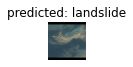

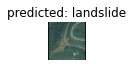

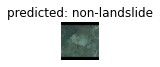

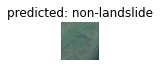

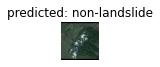

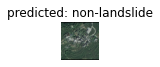

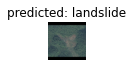

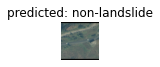

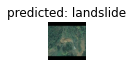

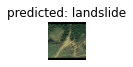

In [ ]:
visualize_model(final_model)
plt.ioff()
plt.show()

In [ ]:
%tensorboard --logdir=runs/

Reusing TensorBoard on port 6006 (pid 422), started 6:20:42 ago. (Use '!kill 422' to kill it.)

<IPython.core.display.Javascript object>

In [ ]:
PATH = '/content/drive/MyDrive/'
# torch.save(final_model, PATH + 'autoencode_epoch_'+str(30))
torch.save(final_model.state_dict(), PATH + "autoencoder_classifier_model.pt")